https://ithelp.ithome.com.tw/m/articles/10288351

In [44]:
# CNN十種彩色照片分類
from keras.datasets import cifar10
from tensorflow.python.keras.utils import np_utils # 在colab上的寫法，一般為 from keras.utils import np_utils
import numpy as np

# 資料整理

## 載入資料

In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [46]:
len(x_train)

50000

In [47]:
len(x_test)

10000

In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [50]:
y_train[0]

array([6], dtype=uint8)

In [51]:
import matplotlib.pyplot as plt

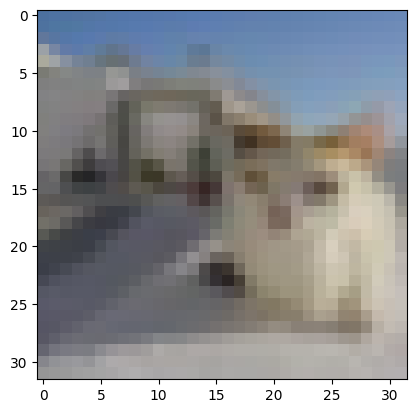

In [52]:
plt.imshow(x_train[80], cmap='binary')

## 收斂

In [53]:
# 先轉成小數點形式再收斂
x_train_normal = x_train.astype('float32')/255
x_test_normal = x_test.astype('float32')/255

In [54]:
x_train_normal[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [55]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# 建模

CNN 模型設計
https://ithelp.ithome.com.tw/articles/10192028

In [56]:
from  keras.models import Sequential
# Dropout 砍掉 Flatten 扁平 Conv2D 二維卷積層 MaxPooling2D 二維池化層
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# 激勵函式
from keras.layers import Activation

In [57]:
# 建模
model = Sequential()
# filters=32 特徵圖 => 濾波器數目，就是下圖的每一階段的輸出面數或是深度，輸出的圖稱為『特徵圖』(Feature Map)，通常是4的倍數。
# kernel_size=(3,3) 卷稽核的大小
# padding='same' 超過邊界時一律補0
# input_shape=(32,32,3) 彩色
# activation='relu' 修正線性單元激勵函式 (把負數變為0)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation='relu'))

In [59]:
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))
# 卷積
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))

In [60]:
# 放棄的比率
model.add(Dropout(0.2))
# 扁平化
model.add(Flatten())
# 通常用1024(三通道 32*32*32)
model.add(Dense(1024, activation='relu'))
# 輸出層：10種分類
model.add(Dense(10, activation='softmax'))

# 編譯(程式)

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練

In [62]:
train_history = model.fit(x_train_normal, y_train, batch_size=128, epochs=30)

Epoch 1/30
391/391 [==============================] - 4s 6ms/step - loss: 1.5237 - accuracy: 0.4535
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.1796 - accuracy: 0.5831
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 1.0382 - accuracy: 0.6352
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.9464 - accuracy: 0.6688
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.8714 - accuracy: 0.6966
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 0.8025 - accuracy: 0.7186
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 0.7514 - accuracy: 0.7358
Epoch 8/30
391/391 [==============================] - 2s 5ms/step - loss: 0.6873 - accuracy: 0.7599
Epoch 9/30
391/391 [==============================] - 2s 5ms/step - loss: 0.6388 - accuracy: 0.7749
Epoch 10/30
391/391 [==============================] - 2s 6ms/step - loss: 0.5889 - accuracy: 0.7937

In [63]:
def showHistory(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.xlabel('Epoch')
  plt.ylabel(train)
  plt.legend(['train', 'validation'], loc=0)
  plt.show()

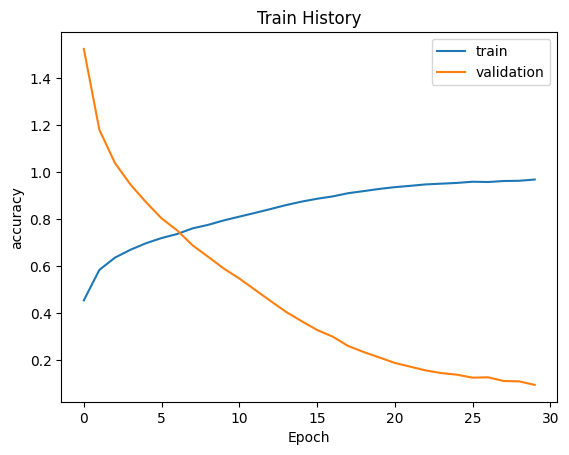

In [64]:
showHistory(train_history, 'accuracy', 'loss')

# 預測

In [65]:
predict = model.predict(x_test_normal)

import numpy as np

# 求可能性
print(np.argmax(predict[3]))

313/313 [==============================] - 1s 2ms/step
0


In [73]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [75]:
# 做標籤
anslabel={0:'airplane', 1:'car', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'boat', 9:'truck'}

In [90]:
# 看答案與預測是否相符
def plot_predict(images, answers, predict, idx, num=40):
  fig = plt.gcf() # 抓取圖大小
  fig.set_size_inches(16, 26) # 設定大小
  for i in range(num):
    ix = plt.subplot(8,5, i+1) # 子圖 各5張 目前第i+1張
    ix.imshow(images[idx], cmap='binary')
    lab = np.argmax(answers[i])
    # 原本的
    title = str(i) + "-" + anslabel[lab]
    ans = np.argmax(predict[i])
    # 預測的
    title += "==>" + anslabel[ans]
    ix.set_title(title, fontsize=8)
    idx += 1
  plt.show()

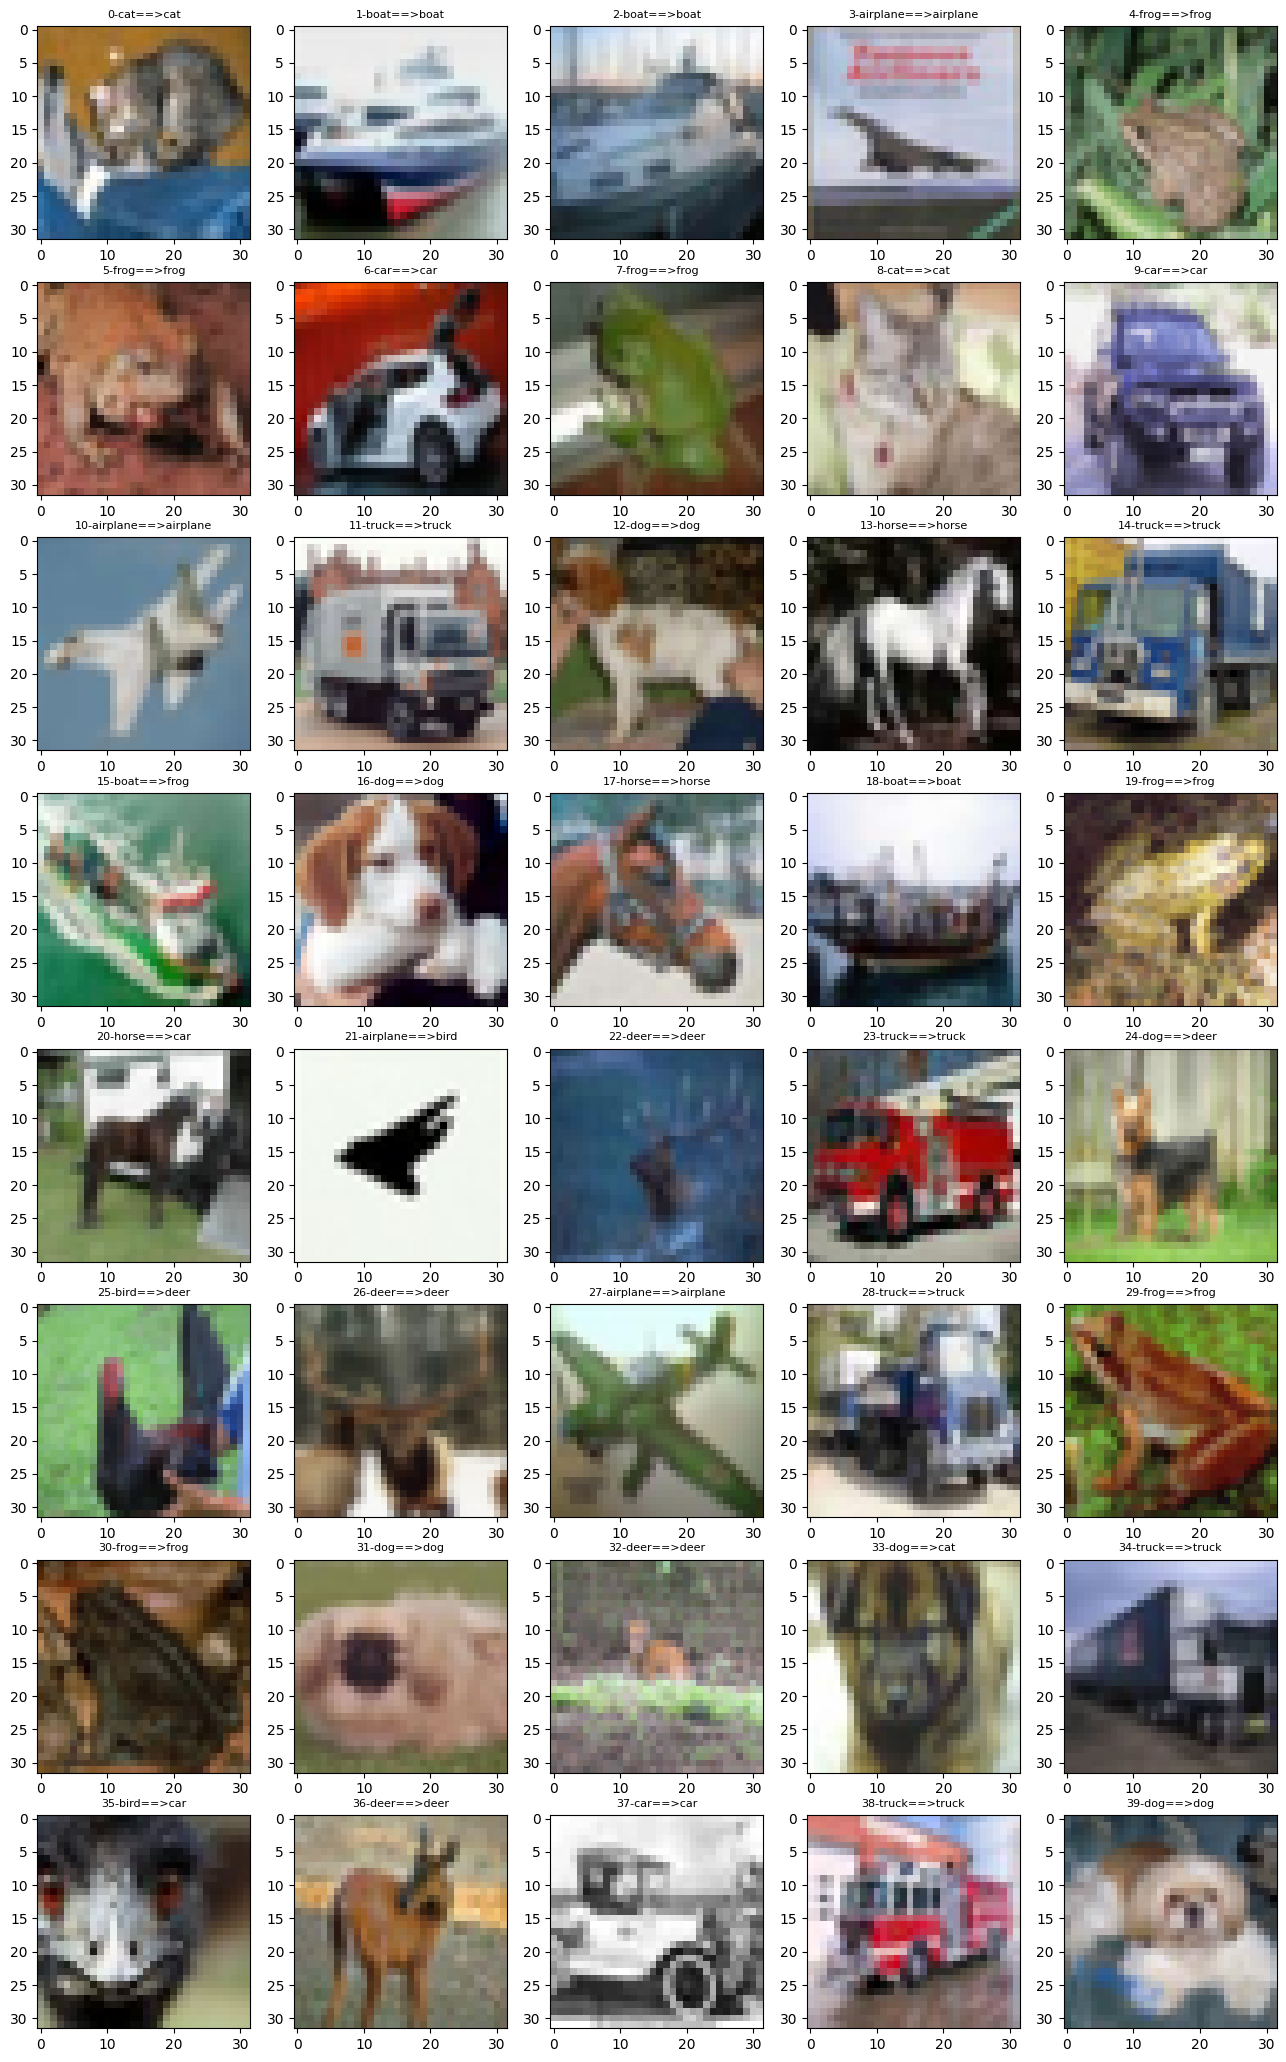

In [91]:
plot_predict(x_test, y_test, predict, 0)

# 模型存檔

將訓練好的模型存檔

In [92]:
# h5 => HDF5 格式: 一種資料模型、函式庫與儲存資料的檔案格式，非常適合儲存大量科學計算或是觀測的數據。
model.save('tenPhoto.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 載入模型

In [93]:
import tensorflow
md = tensorflow.keras.models.load_model('/content/tenPhoto.h5')
pred = md.predict(x_test_normal)

313/313 [==============================] - 1s 2ms/step


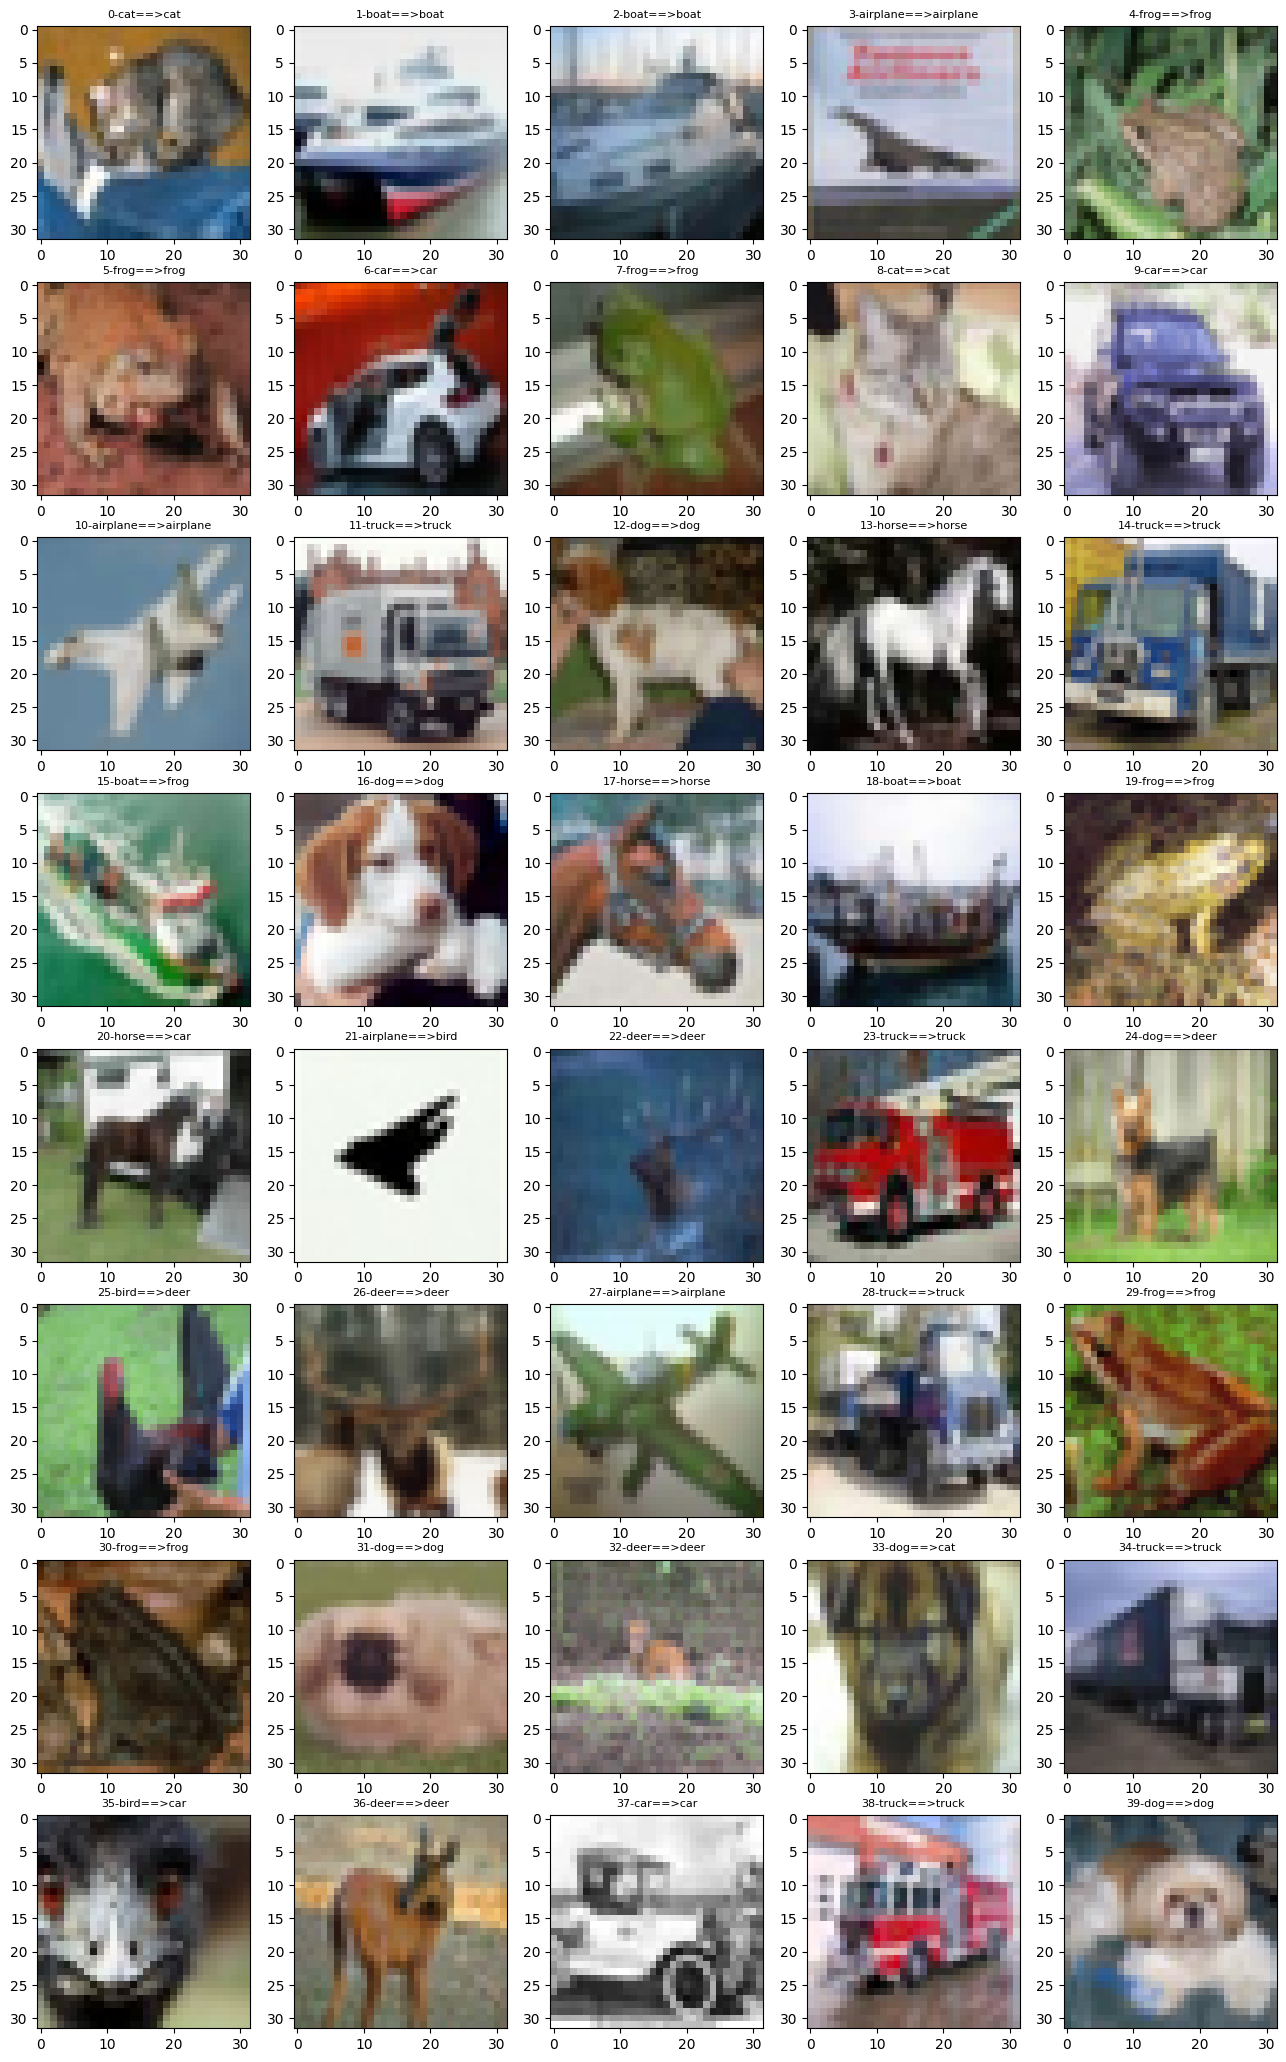

In [94]:
plot_predict(x_test, y_test, pred, 0)